<a href="https://colab.research.google.com/github/kd0176/Covid-19-Tweet-Sentiment-Analysis/blob/main/Covid_19_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name :**   **Covid-19 Tweet Sentiment Analysis**


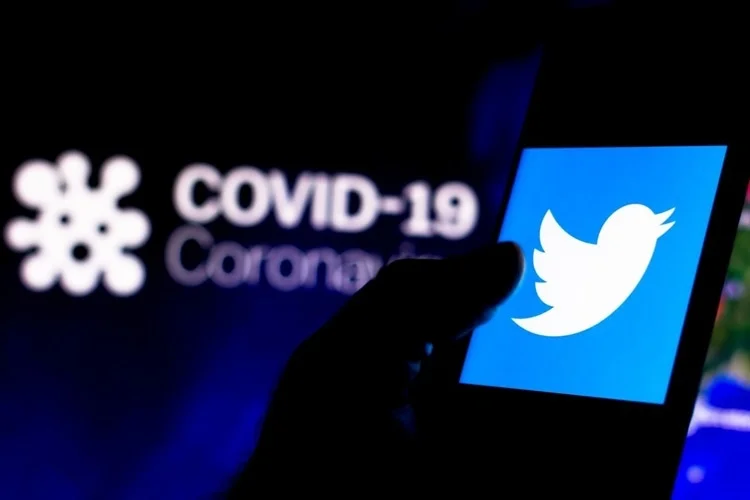

##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

####This Project is for sentiment analysis of Tweets related to the Covid-19 pandemic, which is a multi-label classification task. Since the outbreak of coronavirus, it has affected more than 180 countries where massive losses in the economy and jobs globally and confining about 58% of the global population are caused. The research on people’s feelings is essential for keeping mental health and informed about Covid-19.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


#### This challenge asks you to build a classification ML model to predict the sentiment of covid-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done then. the names and usernames have been given codes to avoid any privacy concerns.

## Dataset Description
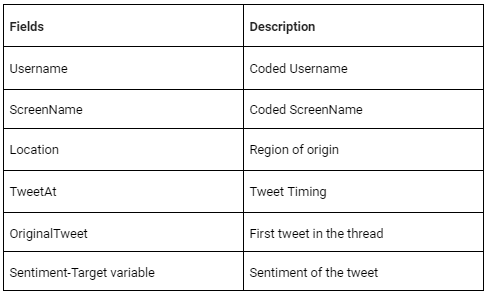

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [89]:
# Import Libraries

import numpy as np                                             # numerical computations
import pandas as pd                                            # data analyze

import seaborn as sns                                          # data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                                                # Ignore warnings
warnings.filterwarnings("ignore")

# install and import plotly           
import subprocess                                              
batcmd = "pip install plotly==5.8.0"                          # Geographical visualization
result = subprocess.check_output(batcmd, shell=True)
import plotly.express as px

from geopy.geocoders import Nominatim                         # To get latitude and longitude of location
from geopy.exc import GeocoderTimedOut                         


### Dataset Loading

In [173]:
# Load Dataset
url='https://drive.google.com/file/d/1Z_35uIfRSiDleNUslnr9W9ImFMRNg-tm/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='latin-1')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
# Missing Values/Null Values percentage
df.isnull().sum()/df.shape[0]*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

Text(0.5, 1.0, 'Visualizing the missing values')

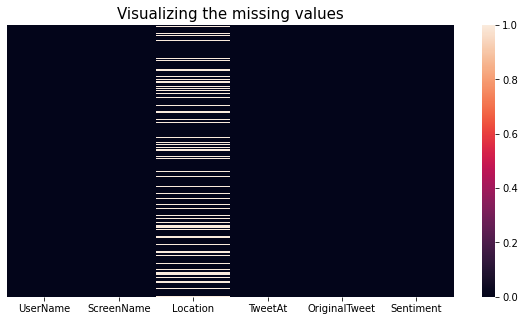

In [10]:
# Visualizing the missing values using Heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar=True, annot=False, yticklabels=False)
plt.title('Visualizing the missing values', fontsize = 15)

### What did you know about your dataset?

* There are 41157 rows and 6 columns in this dataset.
* Dataset has no duplicated rows.
* Location column contains approx 21% of null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include = 'all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description 

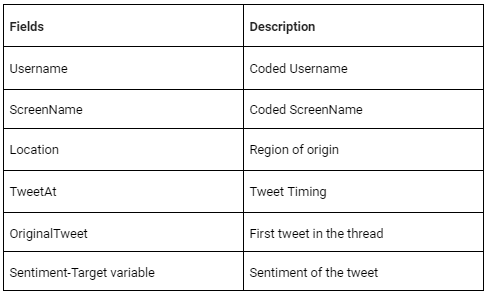

### Check Unique Values for each variable.

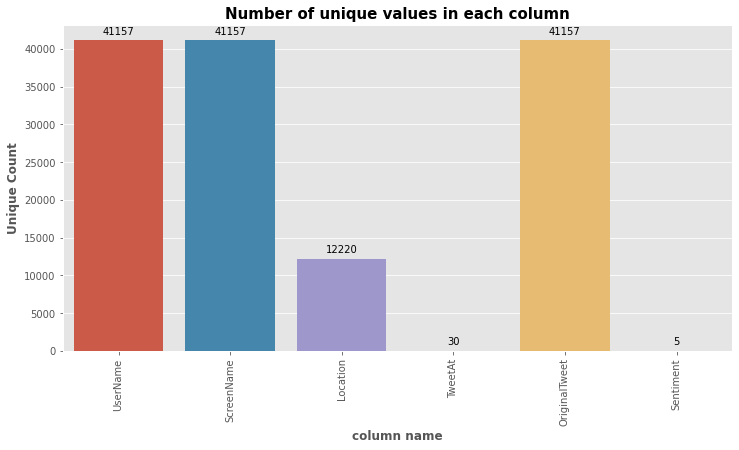

In [182]:
# Check Unique Values for each variable.

unique_df=pd.DataFrame()
unique_df['column name']=df.columns
unique_count=[]
for i in df.columns:
  unique_count.append(df[i].nunique())
unique_df['unique_count']=unique_count



plt.figure(figsize = (12,6))

splot = sns.barplot(x=unique_df['column name'], y=unique_df['unique_count'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique Count', size=12, weight='bold')
plt.xlabel('column name', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Check Unique Values for 'TweetAt'
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [15]:
# Check Unique Values for 'Sentiment'
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

----observation----
* By checking unique value for TweetAt column which is tweet date we found out that dataset has 30 days of data. 

* Target variable ('Sentiment') has 5 different classes. 

## 3. ***Data Wrangling***

### Write your code to make your dataset analysis ready.

In [16]:
# Drop 'UserName' and 'screenName' column
df.drop(['UserName', 'ScreenName'], axis = 1, inplace = True) 

In [17]:
# Create new column 'tweet_length' by getting number of total character present in each tweet
df['tweet_length'] = df['OriginalTweet'].str.len()


Get latitude and longitude for frequent locations, considering locations having at least 50 total tweets

In [44]:
# create function to get latitude and longitude of location
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim()
def geocode(city, recursion=0):
  '''
  this function will return latitude and longitude of a location
  '''
  try:
      return geolocator.geocode(city, timeout=None)
  except GeocoderTimedOut as e:
      if recursion > 10:      # max recursions
            raise e

        # time.sleep(1) # wait a bit
        # try again
  return geocode(city, recursion=recursion + 1)


# Get frequent locations to list
top_loc = df['Location'].value_counts()
top_loc = top_loc[top_loc > 50]                # locations having at least 50 tweets
top_loc_list = top_loc.index.tolist()


lat_dict = {}        # empty dict to store latitude
long_dict = {}       # empty dict to store longitude


# iterate over frequent location list
for i in top_loc_list:
  lat_long = geocode(i)[1]             # calling geocode function to get latitude and longitude
  lat_dict[i] = lat_long[0]
  long_dict[i] = lat_long[1]


# mapping latitude and longitude of location
df['latitude'] = df['Location'].map(lat_dict)           
df['longitude'] = df['Location'].map(long_dict) 

In [90]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,tweet_length,latitude,longitude
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,51.507336,-0.127650
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,54.702354,-3.276575
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,NaN,NaN
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,NaN,NaN
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,NaN,NaN


### What all manipulations have you done and insights you found?

`Answer Here.`

* The 'UserName' and 'ScreenName' columns are not giving any meaningful insights for our analysis, so we droped these two columns.

* Created a new columns 'tweet_length' for EDA by calculating total number of characters present in each tweet.

* Get latitude and longitude for frequent locations, only considering locations having at least 50 total tweets.

* Not considering every location beacause it was taking too much time in getting latitude and longitude of all 12,220 locations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Pie chart for visualizing sentiment proportion.**

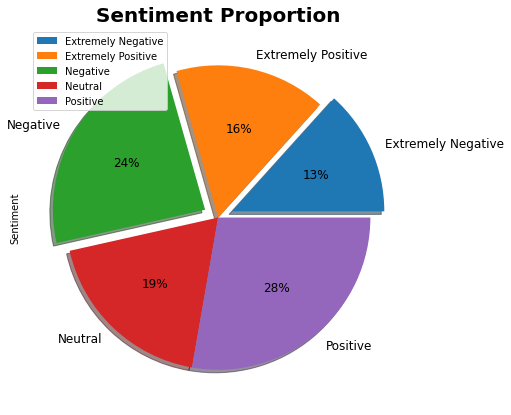

In [20]:
# Plotting pie chart for visualizing sentiment proportion.
plt.figure(figsize = (10,7))
df.groupby('Sentiment')['Sentiment'].count().plot(kind='pie', autopct='%1.0f%%',shadow = True, explode = [0.1,0,0.1,0,0], fontsize = 12)
plt.title('Sentiment Proportion', fontsize = 20, weight='bold')
plt.legend(loc = 'best')
plt.show()

##### 1. Why did you pick the specific chart?

`Answer Here.`

Pie charts are commonly used in data visualization to display proportions or percentages of a whole. They can be useful for presenting data in a clear and concise way, particularly when you want to show the relative sizes of different categories.

Some of the benefits of using pie charts include:
* Easy to understand
* Good for displaying proportions
* Useful for comparisons
* Attractive
* Can highlight trends

##### 2. What is/are the insight(s) found from the chart?

`----insights----`

* There are five types of sentiments - Positive, Extremly Positive, Negative, Extremly Negative, Neutral.

* Number of total Positive tweets are more than total Negative tweets.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Top 20 most frequent locations** 

Text(0.5, 1.0, 'Top 20 most frequent locations')

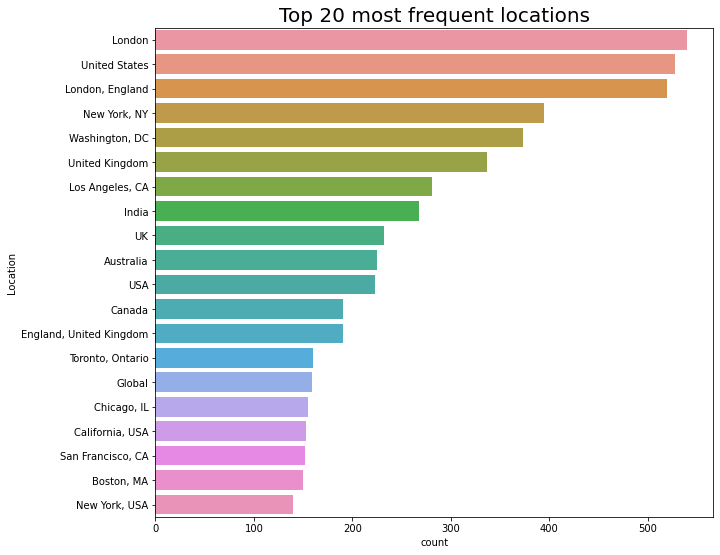

In [123]:

top_locations = df['Location'].value_counts().reset_index().head(20)

f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(data = top_locations, x = 'Location', y = 'index', orient='h')
ax.set( ylabel = 'Location', xlabel="count")
ax.set_title('Top 20 most frequent locations', fontdict={'size': 20})


##### 1. Why did you pick the specific chart?

`Answer Here.`

Horizontal bar graphs are a type of chart that displays data using horizontal bars to represent values. They are useful for visualizing comparisons between categories, where the length of the bar represents the value of the category.

Some benifits of using Horizontal Bar graphs are:

* Efficient use of space
* Easier to compare values
* Better for showing rank order
* More visually appealing

##### 2. What is/are the insight(s) found from the chart?

`----insights----`
* Maximum number of tweets are coming from London, New York and Washington DC.
* If we look country wise than we can say maximum number of tweets are coming from UK and USA.

## **Ploting and visualizing frequent locations according to negative tweet counts on real world map** 

Only considering locations having at least 50 tweets



In [88]:
# filtering and counting negative tweets at different locations
neg_tweet_count_df = df[df['Sentiment'].isin(['Negative', 'Extremely Negative'])].groupby(['latitude', 'longitude'])['OriginalTweet'].count().to_frame('Negative Tweet Count').reset_index()

# ploting Negative tweet count on Real world map
fig = px.scatter_mapbox(neg_tweet_count_df, lat='latitude', lon='longitude', color="Negative Tweet Count", size="Negative Tweet Count",
                        mapbox_style="open-street-map", color_continuous_scale=px.colors.sequential.Bluered,  zoom=0.5, height=600, width=1000,)
 
fig.show()

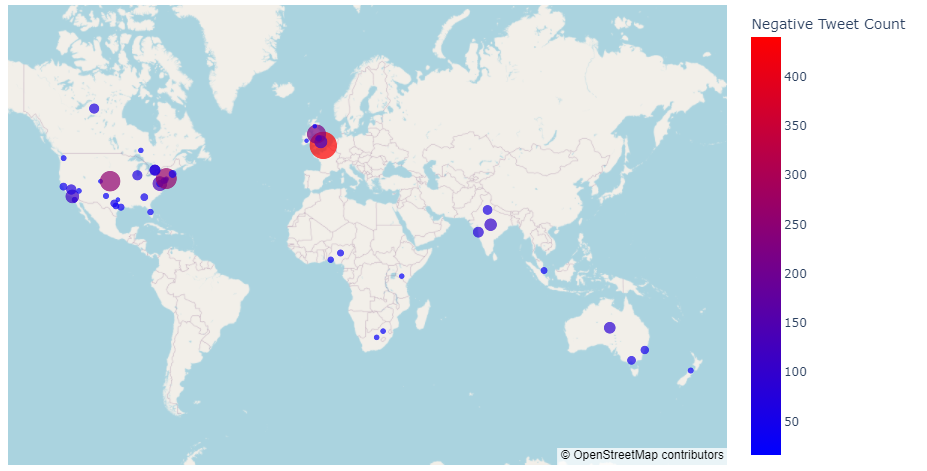

##### 1. Why did you pick the specific chart?

`Answer Here.`

Plotly's scattermapbox is a useful data visualization tool that can be used to display geospatial data on a map. some reasons why you might choose to use scattermapbox are:

* Show spatial relationships
* Display additional information
* Interactive features
* Customize appearance
* Integration with other Plotly tools

##### 2. What is/are the insight(s) found from the chart?

`----insights----`

* Most of the Negative tweets are coming from UK and USA.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Line chart for visualizing OriginalTweet count according to TweetAt (Date)**

Text(0, 0.5, 'Tweets count')

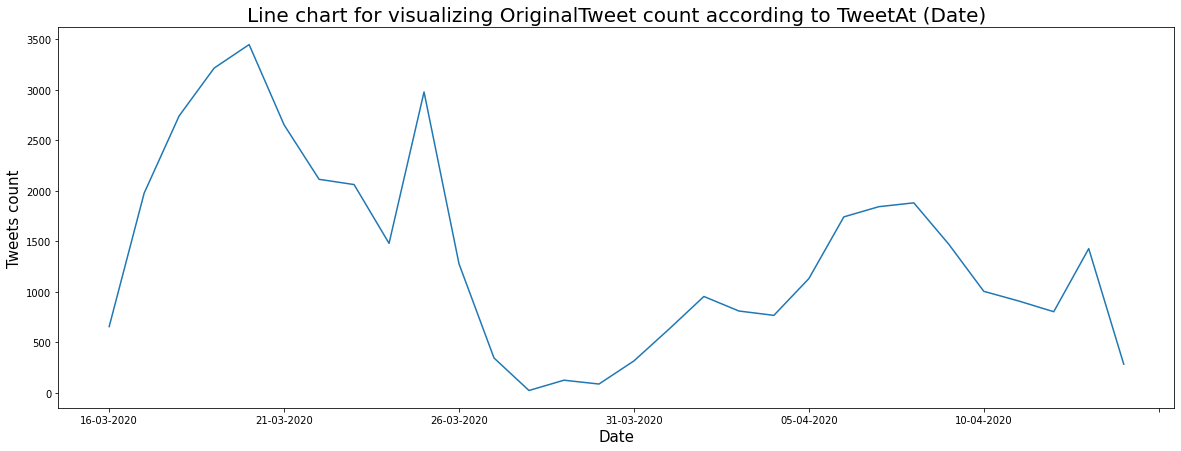

In [152]:
# Plting Line chart for visualizing OriginalTweet count according to TweetAt (Date)
plt.figure(figsize=(20,7))
df.groupby('TweetAt', sort = False)['OriginalTweet'].count().plot()
plt.title('Line chart for visualizing OriginalTweet count according to TweetAt (Date)', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Tweets count', fontsize = 15)

##### 1. Why did you pick the specific chart?

`Answer Here.`

Line charts are a type of chart that display data as a series of points connected by straight lines. They are commonly used to visualize trends over time or to show relationships between two variables.

Benifits of using line chart are:
* Visualize trends over time
* Display relationships between variables
* Easily compare multiple data sets
* Emphasize change over time
* Communicate complex data

##### 2. What is/are the insight(s) found from the chart?

`----insights----`
* Month of March has more tweet count than April. 

## **Plot Histogram for tweet_length**

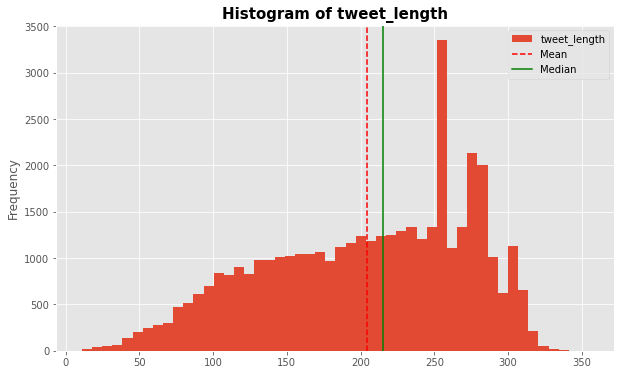

In [172]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')

# plot histogram
df['tweet_length'].plot(bins=50,kind='hist')
plt.title('Histogram of tweet_length', fontsize = 15, weight='bold')

# plot mean line
plt.axvline(df['tweet_length'].mean(), color='r', linestyle='--', label="Mean")
# plot median line
plt.axvline(df['tweet_length'].median(), color='g', linestyle='-', label="Median")

plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

`Answer Here.`

Histograms are a type of chart that display the distribution of numerical data. They are commonly used to visualize the frequency distribution of a single variable or to compare the distribution of two or more variables.

why you might choose to use a histogram:
* Visualize data distribution
* Identify central tendency
* Compare data sets
* Identify outliers
* Determine data range

##### 2. What is/are the insight(s) found from the chart?

`----insights----`

* Average length of tweet is around 200.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Generate WordCloud for Covid-19 Tweets**

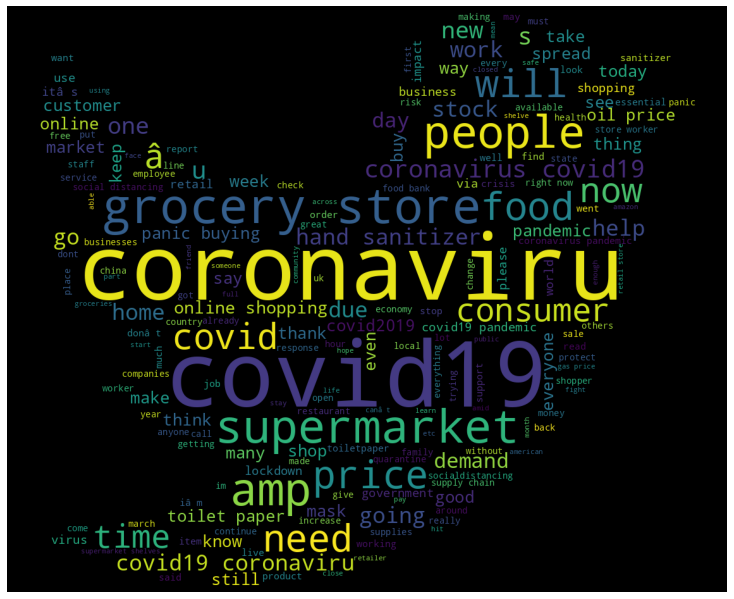

In [186]:
# Codes to generate WordCloud

# import required liberaries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator                    
import string
from PIL import Image
import requests

comment_words = ''
stopwords = set(STOPWORDS)      # list of stopwords
  
# iterate through the OriginalTweet
for val in df.OriginalTweet:
      
    # typecaste each val to string
    val = str(val)
    
    # remove punctuations
    val = [char for char in val if char not in string.punctuation]
    val = ''.join(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)


  
wordcloud = WordCloud(width = 800, height = 800,
                background_color = 'black',
                stopwords = stopwords,
                min_font_size = 10, mask = Mask).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

##### 1. Why did you pick the specific chart?

`Answer Here.`

A word cloud is a graphical representation of textual data in which the size of each word indicates its frequency or importance. Word clouds are useful for visualizing text data, as they allow you to quickly identify the most common or important words in a document or dataset.

why you might want to generate a word cloud :
* Summarizing text: A word cloud can be a quick and effective way to summarize the main themes or topics in a document, article, or blog post.
* Data exploration: Word clouds can help you explore a dataset and identify patterns or trends in the data.
* Presentation: Word clouds can be a visually appealing way to present information or findings.
* Marketing and branding: Word clouds can be used in marketing and branding efforts to help identify the key themes or messages associated with a brand or product.

##### 2. What is/are the insight(s) found from the chart?

`----insights----`
* From the above wordcloud we can observe many common and important words in this dataset like coronavirus, covid 19, grocery, store, food, supermarket, price, online, shopping, hand senitizer and many more.
* words like food, grocery, store, supermarket could mean people are having difficulties in buying grocery or food items.
* Online word could mean people are going more online for shopping, entertainment or social interecting.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***